In [3]:
import nest_asyncio
import numpy as np
import matplotlib.pyplot as plt

from benchmark.application import app, types, config
from benchmark.application.types import BenchmarkParams

nest_asyncio.apply()

benchmark_types = [types.BenchmarkTypes.API, types.BenchmarkTypes.MSG]
cf_list = [100 * (i + 1) for i in range(20)]

bench_param_list = [
    BenchmarkParams(
        benchmark_type = bench_type,
        complexity_factor = cf,
        memory_overhead = 1,
        requests_number = 100,
        batch_size = 2,
        total_progress=True,
    ) for cf in cf_list for bench_type in benchmark_types
]

results = [app.run_benchmark(param, config.Env.DOCKER) for param in bench_param_list]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

Total:   0%|          | 0/100 [00:00<?, ?it/s]

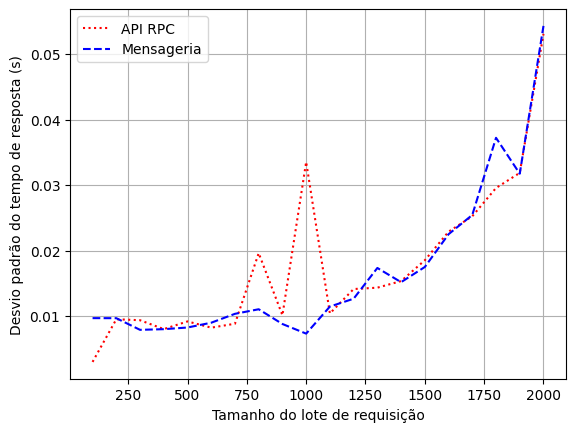

In [24]:
def get_standard_deviation(results):
    return [np.std(np.asarray(result)) for result in results]

plt.plot(
    cf_list, get_standard_deviation(elapsed_times[::2]), ':r', label="API RPC"
)
plt.plot(
    cf_list, get_standard_deviation(elapsed_times[1::2]), '--b', label="Mensageria"
)

plt.legend()
plt.xlabel("Tamanho do lote de requisição")
plt.ylabel("Desvio padrão do tempo de resposta (s)")

plt.grid(True)
plt.show()

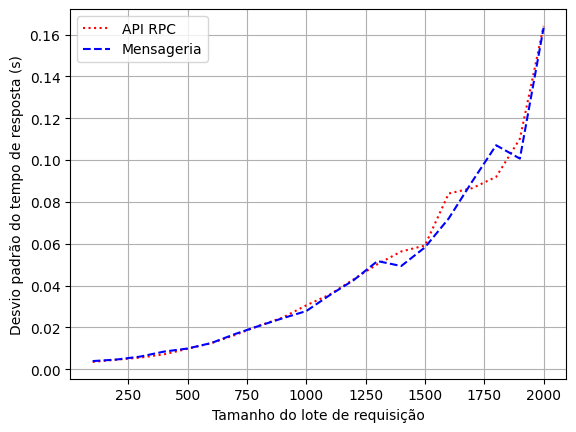

In [23]:
def get_median(results):
    return [np.median(np.asarray(result)) for result in results]

plt.plot(
    cf_list, get_median(elapsed_times[::2]), ':r', label="API RPC"
)
plt.plot(
    cf_list, get_median(elapsed_times[1::2]), '--b', label="Mensageria"
)

plt.legend()
plt.xlabel("Tamanho do lote de requisição")
plt.ylabel("Desvio padrão do tempo de resposta (s)")

plt.grid(True)
plt.show()

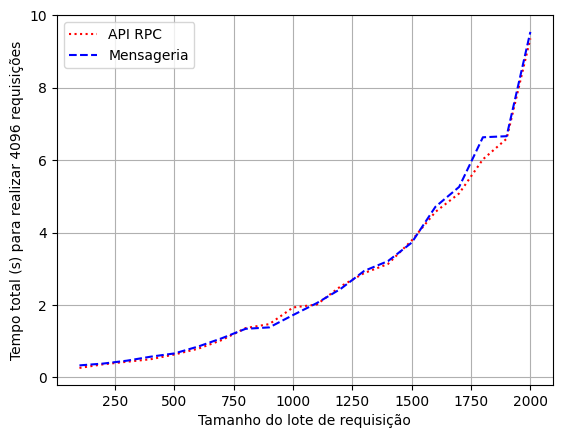

In [22]:
plt.plot(cf_list, [result.elapsed_time for result in results[::2]], ':r', label="API RPC")
plt.plot(cf_list, [result.elapsed_time for result in results[1::2]], '--b', label="Mensageria")

plt.legend()
plt.xlabel("Tamanho do lote de requisição")
plt.ylabel("Tempo total (s) para realizar 4096 requisições")

plt.grid(True)
plt.show()